### Import

In [139]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection 
from sklearn import preprocessing
from sklearn import metrics
from sklearn import neighbors
from sklearn import svm
from sklearn import decomposition
from sklearn.decomposition import PCA

### Load data

In [140]:
def load_data():
    # this_directory = os.path.dirname(os.path.abspath(__file__))
    data = pd.read_csv(os.path.join('hn', 'HN_radiomicFeatures.csv'), index_col=0)

    return data


data = load_data()
label = data["label"]
data = data.drop(["label"], axis=1)
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

The number of samples: 113
The number of columns: 159


### Check for missing data

In [141]:
# Detect missing values in dataframe
data.isnull().values.any()

False

### Exclude features with zero variance

In [142]:
# exclude features with zero variances
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(data)
selector.fit_transform(data).shape

(113, 157)

### Data split

In [143]:
train_data, test_data, train_label, test_label = train_test_split(data, label, train_size=0.8)
# train_data, val_data, train_label, val_label = train_test_split(train_val_data, train_val_label, train_size=0.85)

print(f'The number of train samples: {train_data.shape[0]}')
# print(f'The number of validation samples: {val_data.shape[0]}')
print(f'The number of test samples: {test_data.shape[0]}')

The number of train samples: 90
The number of test samples: 23


### Scaling train data

In [144]:
scaler = StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

### Scaler & Linear Classifier

In [145]:
clf = SGDClassifier()
clf.fit(train_data, train_label)
print(np.shape(clf.coef_))
print(clf.intercept_)

label_train_pred = clf.predict(train_data)
print(metrics.accuracy_score(train_label, label_train_pred))

y_pred = clf.predict(test_data)
print(metrics.accuracy_score(test_label, y_pred))

(1, 159)
[-82.0359917]
1.0
0.6956521739130435


### kNN classifier

In [146]:
# Perform a PCA
pca = decomposition.PCA(n_components=10)
pca.fit(train_data)
train_pca = pca.transform(train_data)
test_pca = pca.transform(test_data)
print(sum(pca.explained_variance_ratio_))

# Fit kNN
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(train_pca, train_label)
score_train = knn.score(train_pca, train_label)
score_test = knn.score(test_pca, test_label)

# Print result
print(f"Training result: {score_train}")
print(f"Test result: {score_test}")

0.7113865111394202
Training result: 0.7666666666666667
Test result: 0.7391304347826086


### Find average accuracy over multiple classifications

In [159]:
# Find mean accuracy for 10 kNN classifications
loops = 100
score_train = np.zeros(loops)
score_test = np.zeros(loops)

for i in range(loops):
    train_data, test_data, train_label, test_label = train_test_split(data, label, train_size=0.8)
    scaler = StandardScaler().fit(train_data)
    train_data = scaler.transform(train_data)
    test_data = scaler.transform(test_data)

    # Perform a PCA
    pca = decomposition.PCA(n_components=10)
    pca.fit(train_data)
    train_pca = pca.transform(train_data)
    test_pca = pca.transform(test_data)

    # Fit kNN
    knn = neighbors.KNeighborsClassifier(n_neighbors=10)
    knn.fit(train_pca, train_label)
    score_train[i] = knn.score(train_pca, train_label)
    score_test[i] = knn.score(test_pca, test_label)

mean_score_train = np.mean(score_train)
mean_score_test = np.mean(score_test)
print(score_train)
print(score_test)
print(f"Mean training score: {mean_score_train}")
print(f"Mean test score: {mean_score_test}")

[0.77777778 0.82222222 0.71111111 0.78888889 0.77777778 0.75555556
 0.76666667 0.73333333 0.76666667 0.74444444 0.74444444 0.77777778
 0.75555556 0.81111111 0.74444444 0.77777778 0.8        0.81111111
 0.81111111 0.71111111 0.74444444 0.75555556 0.77777778 0.75555556
 0.73333333 0.72222222 0.74444444 0.76666667 0.74444444 0.73333333
 0.77777778 0.71111111 0.72222222 0.81111111 0.76666667 0.81111111
 0.72222222 0.76666667 0.76666667 0.76666667 0.81111111 0.8
 0.8        0.77777778 0.75555556 0.77777778 0.75555556 0.72222222
 0.76666667 0.73333333 0.77777778 0.77777778 0.77777778 0.78888889
 0.82222222 0.75555556 0.78888889 0.77777778 0.75555556 0.75555556
 0.77777778 0.75555556 0.73333333 0.77777778 0.73333333 0.78888889
 0.76666667 0.8        0.76666667 0.72222222 0.76666667 0.78888889
 0.72222222 0.74444444 0.76666667 0.81111111 0.78888889 0.71111111
 0.72222222 0.8        0.71111111 0.72222222 0.77777778 0.74444444
 0.75555556 0.74444444 0.75555556 0.75555556 0.81111111 0.73333333
 0

C:\Users\vmart\miniconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [145 146 147] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\vmart\miniconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Feature 0: 21.596952
Feature 1: 14.862256
Feature 2: 2.867526
Feature 3: 2.291943
Feature 4: 1.082412
Feature 5: 2.298406
Feature 6: 1.014224
Feature 7: 11.203047
Feature 8: 10.775771
Feature 9: 2.904107
Feature 10: 0.512845
Feature 11: 1.570801
Feature 12: 0.083657
Feature 13: 5.520337
Feature 14: 0.007973
Feature 15: 0.871809
Feature 16: 2.845013
Feature 17: 5.026702
Feature 18: 2.883427
Feature 19: 1.354352
Feature 20: 0.094705
Feature 21: 0.000443
Feature 22: 0.365624
Feature 23: 2.704947
Feature 24: 1.244324
Feature 25: 32.758085
Feature 26: 21.751393
Feature 27: 2.080343
Feature 28: 20.774288
Feature 29: 2.180891
Feature 30: 0.702197
Feature 31: 15.082070
Feature 32: 28.727851
Feature 33: 0.195714
Feature 34: 0.195714
Feature 35: 5.769136
Feature 36: 27.355884
Feature 37: 20.762783
Feature 38: 14.712671
Feature 39: 5.769136
Feature 40: 37.480857
Feature 41: 26.759724
Feature 42: 23.951111
Feature 43: 28.331741
Feature 44: 28.212241
Feature 45: 15.565810
Feature 46: 0.064701
Featu

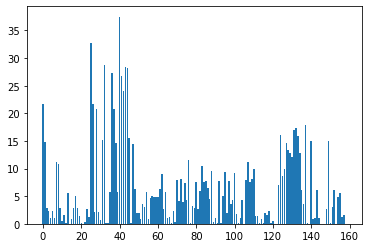

In [136]:
# You can understand the F-Scores as a measure of how informative each feature is for your dataset.
# As it is explained in the method documentation, an F-test is carried out to assess each feature. 
# The F-scores are the test statistic for the F-test, and they basically represent the ratio between the explained and the unexplained variance.

fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(train_data, train_label)

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()